# IMPORT LIBRARIES AND GET THE DATA USING SQL ALCHEMY

In [84]:
import pyodbc
import sqlalchemy as sal
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connection parameters
credentials = {
    "host"      : "lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com",
    "port"      : "5432",
    "database"  : "mid_term_project",
    "user"      : "lhl_student",
    "password"  : "lhl_student"
}

In [4]:
link = "postgresql+psycopg2://" + credentials["user"] + ':' + credentials["password"] +\
     '@' + credentials["host"] + ':' + credentials["port"] + '/' + \
     credentials['database']


In [5]:
engine = create_engine(link)

# DATAFRAME JANUARY 2018

In [6]:
query = "SELECT fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,arr_delay FROM flights WHERE fl_date between '2018-01-01' and '2018-01-07' ORDER BY fl_date ASC LIMIT 15000000;"

In [7]:
df_flights_2018 = pd.read_sql_query(query, engine)

In [8]:
df_flights_2018 = df_flights_2018.rename(columns={"op_unique_carrier": "unique_carrier"})

In [9]:
df_flights_2018

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay
0,2018-01-01,12197,10397,1636.0,1500,780.0,DL,5286,EV,112.0
1,2018-01-01,12953,11057,1559.0,1559,544.0,DL,5287,EV,-16.0
2,2018-01-01,10994,12953,838.0,845,641.0,DL,5288,EV,-7.0
3,2018-01-01,10397,12945,2220.0,2215,304.0,DL,5291,EV,-4.0
4,2018-01-01,12953,11042,1555.0,1559,419.0,DL,5296,EV,-16.0
...,...,...,...,...,...,...,...,...,...,...
133854,2018-01-07,14893,14679,554.0,600,480.0,AS,2853,QX,-12.0
133855,2018-01-07,14679,11638,823.0,825,314.0,AS,2854,QX,-20.0
133856,2018-01-07,14747,14893,2206.0,2212,605.0,AS,2855,QX,-22.0
133857,2018-01-07,14057,14831,1539.0,1520,569.0,AS,2857,QX,17.0


In [81]:
data = ProfileReport(df_flights_2018)

NameError: name 'ProfileReport' is not defined

### DATAFRAME FUEL COMSUMPTION JANUARY 2018 

In [10]:
query_fuel_consum = "SELECT airline_id,unique_carrier,month,year FROM fuel_comsumption WHERE month = 1 and year = 2018 LIMIT 15000000"

In [11]:
df_fuel_comsumption_2018 = pd.read_sql_query(query_fuel_consum, engine)

In [12]:
df_fuel_comsumption_2018

,airline_id,unique_carrier,month,year
0,21161.0,09Q,1,2018
1,21352.0,0WQ,1,2018
2,21652.0,27Q,1,2018
3,21712.0,2HQ,1,2018
4,20408.0,5V,1,2018
5,19917.0,5X,1,2018
6,20007.0,5Y,1,2018
7,19874.0,8C,1,2018
8,20363.0,9E,1,2018
9,20190.0,9S,1,2018


### DATAFRAME PASSANGER JANUARY 2018

In [13]:
query_passengers_january_2018 = "SELECT passengers,seats,unique_carrier,year,month FROM passengers WHERE month = 1 and year = 2018 LIMIT 15000000"

In [14]:
df_passengers_January_2018 = pd.read_sql_query(query_passengers_january_2018, engine)

In [15]:
df_passengers_January_2018

,passengers,seats,unique_carrier,year,month
0,69.0,76.0,9E,2018,1
1,28.0,76.0,9E,2018,1
2,69.0,76.0,9E,2018,1
3,8.0,76.0,9E,2018,1
4,38.0,76.0,9E,2018,1
...,...,...,...,...,...
38832,24.0,175.0,WN,2018,1
38833,90.0,143.0,WN,2018,1
38834,141.0,143.0,WN,2018,1
38835,62.0,158.0,DL,2018,1


In [16]:
df_flights_2018 = df_flights_2018.merge(df_fuel_comsumption_2018, on='unique_carrier')

In [17]:
df_flights_2018 = df_flights_2018.astype({"origin_airport_id":"int","dest_airport_id":"int","mkt_carrier_fl_num":"int","month":"int","year":"int"})

In [18]:
# Select columns with 'float64' dtype  
float64_cols = list(df_flights_2018.select_dtypes(include='float64'))

# The same code again calling the columns
df_flights_2018[float64_cols] = df_flights_2018[float64_cols].astype('float32')

In [19]:
df_flights_2018.dtypes

fl_date                object
origin_airport_id       int32
dest_airport_id         int32
dep_time              float32
crs_dep_time            int64
distance              float32
mkt_carrier            object
mkt_carrier_fl_num      int32
unique_carrier         object
arr_delay             float32
airline_id            float32
month                   int32
year                    int32
dtype: object

In [19]:
df_flights_2018

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,month,year
0,2018-01-01,11298,13930,1311.0,1235,802.0,AA,1233,AA,22.0,19805.0,1,2018
1,2018-01-01,11057,13303,949.0,955,650.0,AA,1234,AA,-15.0,19805.0,1,2018
2,2018-01-01,14831,13930,738.0,745,1829.0,AA,1235,AA,-11.0,19805.0,1,2018
3,2018-01-01,12478,13303,1333.0,1330,1089.0,AA,1236,AA,13.0,19805.0,1,2018
4,2018-01-01,11298,11697,1838.0,1830,1119.0,AA,1237,AA,-1.0,19805.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127094,2018-01-07,10140,14908,1334.0,1340,650.0,AS,2797,QX,-23.0,19687.0,1,2018
127095,2018-01-07,14908,10140,1619.0,1630,650.0,AS,2798,QX,-39.0,19687.0,1,2018
127096,2018-01-07,12278,14747,1814.0,1822,1430.0,AS,2799,QX,-24.0,19687.0,1,2018
127097,2018-01-07,10299,11630,654.0,700,261.0,AS,2801,QX,-15.0,19687.0,1,2018


In [20]:
#df_flights_2018 = df_flights_2018.merge(df_passengers_January_2018, on='unique_carrier')

In [20]:
df_flights_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127099 entries, 0 to 127098
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             127099 non-null  object 
 1   origin_airport_id   127099 non-null  int32  
 2   dest_airport_id     127099 non-null  int32  
 3   dep_time            127099 non-null  float32
 4   crs_dep_time        127099 non-null  int64  
 5   distance            127099 non-null  float32
 6   mkt_carrier         127099 non-null  object 
 7   mkt_carrier_fl_num  127099 non-null  int32  
 8   unique_carrier      127099 non-null  object 
 9   arr_delay           126838 non-null  float32
 10  airline_id          127099 non-null  float32
 11  month               127099 non-null  int32  
 12  year                127099 non-null  int32  
dtypes: float32(4), int32(5), int64(1), object(3)
memory usage: 9.2+ MB


# DATAFRAME JANUARY 2019

In [21]:
query_jan_2019 = "SELECT fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,arr_delay FROM flights WHERE fl_date between '2019-01-01' and '2019-01-07' ORDER BY fl_date LIMIT 15000000;"

In [22]:
df_flights_2019 = pd.read_sql_query(query_jan_2019, engine)

In [23]:
df_flights_2019 = df_flights_2019.rename(columns={"op_unique_carrier": "unique_carrier"})

In [24]:
df_flights_2019

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay
0,2019-01-01,14955,12016,1818.0,1825,129.0,UA,105,UA,-6.0
1,2019-01-01,12016,14955,1644.0,1650,129.0,UA,104,UA,-4.0
2,2019-01-01,11057,11433,1628.0,1632,500.0,AA,5646,OH,-27.0
3,2019-01-01,11433,11057,1904.0,1904,500.0,AA,5646,OH,14.0
4,2019-01-01,11057,12217,1805.0,1800,333.0,AA,5647,OH,14.0
...,...,...,...,...,...,...,...,...,...,...
146480,2019-01-07,13342,12953,556.0,600,738.0,WN,2166,WN,-19.0
146481,2019-01-07,13342,13198,1008.0,1015,436.0,WN,489,WN,-18.0
146482,2019-01-07,13342,13198,1632.0,1640,436.0,WN,941,WN,-21.0
146483,2019-01-07,13342,13204,1717.0,1720,1066.0,WN,1546,WN,-7.0


### DATAFRAME FUEL COMSUMPTION JANUARY 2019

In [25]:
query_fuel_consum_january_2019 = "SELECT airline_id,unique_carrier,month,year FROM fuel_comsumption WHERE month = 1 and year = 2019 LIMIT 15000000"


In [26]:
df_fuel_comsumption_2019 = pd.read_sql_query(query_fuel_consum_january_2019, engine)

In [27]:
df_fuel_comsumption_2019

,airline_id,unique_carrier,month,year
0,21161.0,09Q,1,2019
1,21352.0,0WQ,1,2019
2,21492.0,1BQ,1,2019
3,21652.0,27Q,1,2019
4,21712.0,2HQ,1,2019
5,21974.0,3EQ,1,2019
6,20408.0,5V,1,2019
7,19917.0,5X,1,2019
8,20007.0,5Y,1,2019
9,19874.0,8C,1,2019


In [28]:
df_flights_2019 = df_flights_2019.merge(df_fuel_comsumption_2019, on='unique_carrier')

In [29]:
df_flights_2019

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,month,year
0,2019-01-01,14955,12016,1818.0,1825,129.0,UA,105,UA,-6.0,19977.0,1,2019
1,2019-01-01,12016,14955,1644.0,1650,129.0,UA,104,UA,-4.0,19977.0,1,2019
2,2019-01-01,12266,13303,1958.0,2004,964.0,UA,2146,UA,-5.0,19977.0,1,2019
3,2019-01-01,13930,14679,1316.0,1250,1723.0,UA,2381,UA,34.0,19977.0,1,2019
4,2019-01-01,12264,14683,2045.0,1815,1362.0,UA,2380,UA,156.0,19977.0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139504,2019-01-07,11618,11433,703.0,715,488.0,DL,6305,G7,0.0,20500.0,1,2019
139505,2019-01-07,14492,10721,1222.0,1234,612.0,DL,6306,G7,-26.0,20500.0,1,2019
139506,2019-01-07,14492,11618,825.0,830,416.0,DL,6307,G7,-24.0,20500.0,1,2019
139507,2019-01-07,11433,13296,2225.0,2226,610.0,DL,6308,G7,-24.0,20500.0,1,2019


In [30]:
df_flights_2019 = df_flights_2019.astype({"origin_airport_id":"int","dest_airport_id":"int","mkt_carrier_fl_num":"int","month":"int","year":"int"})

In [31]:
# Select columns with 'float64' dtype  
float64_cols = list(df_flights_2019.select_dtypes(include='float64'))

# The same code again calling the columns
df_flights_2019[float64_cols] = df_flights_2018[float64_cols].astype('float32')

In [32]:
df_flights_2019.dtypes

fl_date                object
origin_airport_id       int32
dest_airport_id         int32
dep_time              float32
crs_dep_time            int64
distance              float32
mkt_carrier            object
mkt_carrier_fl_num      int32
unique_carrier         object
arr_delay             float32
airline_id            float32
month                   int32
year                    int32
dtype: object

# Merge both DataFrames Together

In [33]:
df_information_flights = df_flights_2018.append(df_flights_2019)

In [34]:
df_information_flights

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,month,year
0,2018-01-01,12197,10397,1636.0,1500,780.0,DL,5286,EV,112.0,20366.0,1,2018
1,2018-01-01,12953,11057,1559.0,1559,544.0,DL,5287,EV,-16.0,20366.0,1,2018
2,2018-01-01,10994,12953,838.0,845,641.0,DL,5288,EV,-7.0,20366.0,1,2018
3,2018-01-01,10397,12945,2220.0,2215,304.0,DL,5291,EV,-4.0,20366.0,1,2018
4,2018-01-01,12953,11042,1555.0,1559,419.0,DL,5296,EV,-16.0,20366.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139504,2019-01-07,11618,11433,NaN,715,NaN,DL,6305,G7,NaN,NaN,1,2019
139505,2019-01-07,14492,10721,NaN,1234,NaN,DL,6306,G7,NaN,NaN,1,2019
139506,2019-01-07,14492,11618,NaN,830,NaN,DL,6307,G7,NaN,NaN,1,2019
139507,2019-01-07,11433,13296,NaN,2226,NaN,DL,6308,G7,NaN,NaN,1,2019


### SPLIT COLUMNS OF FL_DATE

In [35]:
df_information_flights['FL_DATE_year'] = pd.to_datetime(df_information_flights['fl_date']).dt.year
df_information_flights['FL_DATE_month'] = pd.to_datetime(df_information_flights['fl_date']).dt.month
# Weekday variable
df_information_flights['FL_DATE_weekday'] = pd.to_datetime(df_information_flights['fl_date']).dt.weekday

In [36]:
df_information_flights

,fl_date,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,month,year,FL_DATE_year,FL_DATE_month,FL_DATE_weekday
0,2018-01-01,12197,10397,1636.0,1500,780.0,DL,5286,EV,112.0,20366.0,1,2018,2018,1,0
1,2018-01-01,12953,11057,1559.0,1559,544.0,DL,5287,EV,-16.0,20366.0,1,2018,2018,1,0
2,2018-01-01,10994,12953,838.0,845,641.0,DL,5288,EV,-7.0,20366.0,1,2018,2018,1,0
3,2018-01-01,10397,12945,2220.0,2215,304.0,DL,5291,EV,-4.0,20366.0,1,2018,2018,1,0
4,2018-01-01,12953,11042,1555.0,1559,419.0,DL,5296,EV,-16.0,20366.0,1,2018,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139504,2019-01-07,11618,11433,NaN,715,NaN,DL,6305,G7,NaN,NaN,1,2019,2019,1,0
139505,2019-01-07,14492,10721,NaN,1234,NaN,DL,6306,G7,NaN,NaN,1,2019,2019,1,0
139506,2019-01-07,14492,11618,NaN,830,NaN,DL,6307,G7,NaN,NaN,1,2019,2019,1,0
139507,2019-01-07,11433,13296,NaN,2226,NaN,DL,6308,G7,NaN,NaN,1,2019,2019,1,0


### DROP UNNECESARY COLUMNS

In [37]:
df_information_flights = df_information_flights.drop(labels=['fl_date', 'month','year'], axis=1)

#### CHECK FOR NULL VALUES

In [38]:
df_information_flights.isnull().sum().sum()

50162

In [39]:
nan_values = df_information_flights.isna().any()
print (nan_values)

origin_airport_id     False
dest_airport_id       False
dep_time               True
crs_dep_time          False
distance               True
mkt_carrier           False
mkt_carrier_fl_num    False
unique_carrier        False
arr_delay              True
airline_id             True
FL_DATE_year          False
FL_DATE_month         False
FL_DATE_weekday       False
dtype: bool


In [40]:
df_information_flights.isna().sum()

origin_airport_id         0
dest_airport_id           0
dep_time              12410
crs_dep_time              0
distance              12410
mkt_carrier               0
mkt_carrier_fl_num        0
unique_carrier            0
arr_delay             12932
airline_id            12410
FL_DATE_year              0
FL_DATE_month             0
FL_DATE_weekday           0
dtype: int64

#### DROP ROWS WITH NULL VALUES OR DUPLICATES


In [41]:
# Drop rows where all data is the same
df_information_flights = df_information_flights.drop_duplicates()

In [42]:
# using dropna() function  
df_information_flights = df_information_flights.dropna()

In [43]:
df_information_flights.isna().sum()

origin_airport_id     0
dest_airport_id       0
dep_time              0
crs_dep_time          0
distance              0
mkt_carrier           0
mkt_carrier_fl_num    0
unique_carrier        0
arr_delay             0
airline_id            0
FL_DATE_year          0
FL_DATE_month         0
FL_DATE_weekday       0
dtype: int64

In [44]:
df_information_flights.unique_carrier.unique()

array(['EV', 'F9', 'HA', 'MQ', 'NK', 'OH', 'WN', 'YV', 'AA', 'CP', 'UA',
       'G7', 'AS', '9E', 'G4', 'YX', 'OO', 'DL', 'QX', 'B6'], dtype=object)

In [45]:
df_information_flights.mkt_carrier.unique()

array(['DL', 'AA', 'UA', 'F9', 'HA', 'NK', 'WN', 'AS', 'G4', 'B6'],
      dtype=object)

### Drop Carrier

In [46]:
df_information_flights = df_information_flights.drop(labels=['mkt_carrier'], axis=1)

In [47]:
# One-hot encoding a single column
from sklearn.preprocessing import OneHotEncoder

In [48]:
df_information_flights

,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,FL_DATE_year,FL_DATE_month,FL_DATE_weekday
0,12197,10397,1636.0,1500,780.0,5286,EV,112.0,20366.0,2018,1,0
1,12953,11057,1559.0,1559,544.0,5287,EV,-16.0,20366.0,2018,1,0
2,10994,12953,838.0,845,641.0,5288,EV,-7.0,20366.0,2018,1,0
3,10397,12945,2220.0,2215,304.0,5291,EV,-4.0,20366.0,2018,1,0
4,12953,11042,1555.0,1559,419.0,5296,EV,-16.0,20366.0,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127094,14108,10466,10.0,1100,1237.0,505,G4,217.0,20409.0,2019,1,6
127095,11697,12945,719.0,1528,1237.0,1702,G4,5.0,20409.0,2019,1,6
127096,12889,11980,1113.0,600,200.0,102,G4,5.0,20409.0,2019,1,6
127097,14082,13230,1724.0,730,209.0,1608,G4,39.0,20409.0,2019,1,6


In [49]:
dummy_unique_carrier = pd.get_dummies(df_information_flights['unique_carrier'])

In [50]:
dummy_unique_carrier

,9E,AA,AS,B6,CP,DL,EV,F9,G4,G7,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127094,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
127095,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
127096,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
127097,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_information_flights = pd.merge(
    left=df_information_flights,
    right=dummy_unique_carrier,
    left_index=True,
    right_index=True,
)

In [52]:
df_information_flights 

,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier_fl_num,unique_carrier,arr_delay,airline_id,FL_DATE_year,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,12197,10397,1636.0,1500,780.0,5286,EV,112.0,20366.0,2018,...,0,0,0,0,0,0,0,0,0,0
0,12197,10397,1636.0,1500,780.0,5286,EV,112.0,20366.0,2018,...,0,0,0,0,0,0,1,0,0,0
0,14955,12016,1636.0,1825,780.0,105,UA,112.0,20366.0,2019,...,0,0,0,0,0,0,0,0,0,0
0,14955,12016,1636.0,1825,780.0,105,UA,112.0,20366.0,2019,...,0,0,0,0,0,0,1,0,0,0
1,12953,11057,1559.0,1559,544.0,5287,EV,-16.0,20366.0,2018,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127097,14082,13230,1724.0,730,209.0,1608,G4,39.0,20409.0,2019,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1908.0,1814,266.0,2533,B6,55.0,20409.0,2018,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1908.0,1814,266.0,2533,B6,55.0,20409.0,2018,...,0,0,0,0,0,0,0,0,0,0
127098,10466,12280,1908.0,1107,266.0,590,G4,55.0,20409.0,2019,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_information_flights = df_information_flights.drop(labels=['unique_carrier'], axis=1)

In [54]:
df_information_flights.dtypes

origin_airport_id       int32
dest_airport_id         int32
dep_time              float32
crs_dep_time            int64
distance              float32
mkt_carrier_fl_num      int32
arr_delay             float32
airline_id            float32
FL_DATE_year            int64
FL_DATE_month           int64
FL_DATE_weekday         int64
9E                      uint8
AA                      uint8
AS                      uint8
B6                      uint8
CP                      uint8
DL                      uint8
EV                      uint8
F9                      uint8
G4                      uint8
G7                      uint8
HA                      uint8
MQ                      uint8
NK                      uint8
OH                      uint8
OO                      uint8
QX                      uint8
UA                      uint8
WN                      uint8
YV                      uint8
YX                      uint8
dtype: object

In [55]:
df_information_flights.describe()

,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,distance,mkt_carrier_fl_num,arr_delay,airline_id,FL_DATE_year,FL_DATE_month,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
count,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.0,507352.0,...,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000,507352.000000
mean,12698.671147,12698.294675,1347.625610,1334.087072,799.197449,2729.797509,9.195477,20003.519531,2018.5,1.0,...,0.012299,0.042669,0.026479,0.039326,0.109206,0.007746,0.087876,0.198872,0.030831,0.041210
std,1521.975561,1522.316933,508.073792,491.844584,592.937561,1920.036192,55.852348,404.387878,0.5,0.0,...,0.110218,0.202109,0.160554,0.194369,0.311898,0.087670,0.283115,0.399152,0.172859,0.198776
min,10135.000000,10135.000000,1.000000,1.000000,31.000000,1.000000,-78.000000,19393.000000,2018.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11292.000000,11292.000000,928.000000,920.000000,362.000000,1075.000000,-14.000000,19790.000000,2018.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12889.000000,12889.000000,1339.000000,1325.000000,641.000000,2263.000000,-4.000000,19977.000000,2018.5,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14057.000000,14057.000000,1752.000000,1738.000000,1039.000000,4311.000000,12.000000,20368.000000,2019.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16218.000000,16218.000000,2400.000000,2359.000000,4983.000000,9401.000000,1778.000000,21167.000000,2019.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### OPTIONAL , just for testing purporses, otherwise , jump to scale and dont run this cell 
Drop  airline_id since is not on the test set

In [56]:
df_information_flights = df_information_flights.drop(labels=['airline_id'], axis=1)

### Get the origin airport average in relation with delay in order to handle this categorical value

In [188]:
#origin_average = df_information_flights.groupby('origin_airport_id')['arr_delay'].mean()

In [189]:
#df_origin_average = origin_average.to_frame().reset_index()

In [190]:
#df_origin_average.rename(columns = {'arr_delay':'mean_delay_origin'}, inplace = True)

In [191]:
#df_origin_average

,origin_airport_id,mean_delay_origin
0,10135,21.585365
1,10136,24.873417
2,10140,3.669811
3,10141,24.857143
4,10146,43.433334
...,...,...
347,15919,9.973040
348,15991,-0.956522
349,16101,13.500000
350,16133,75.000000


### Get the dest airport average in relation with delay in order to handle this categorical value

In [192]:
#dest_average = df_information_flights.groupby('dest_airport_id')['arr_delay'].mean()

In [193]:
#df_dest_average = dest_average.to_frame().reset_index() 

In [194]:
#df_dest_average.rename(columns = {'arr_delay':'mean_delay_dest'}, inplace = True)

In [195]:
#df_dest_average

,dest_airport_id,mean_delay_dest
0,10135,12.362904
1,10136,22.278481
2,10140,3.718488
3,10141,-8.142858
4,10146,-4.774194
...,...,...
347,15919,8.143553
348,15991,-0.130435
349,16101,-0.045455
350,16133,59.500000


In [57]:
df_information_flights = df_information_flights.drop(labels=['dep_time'], axis=1)

In [197]:
#df_information_flights = df_information_flights.merge(df_origin_average, on='origin_airport_id')

In [198]:
#df_information_flights = df_information_flights.merge(df_dest_average, on='dest_airport_id')

### Momentary take two dataframes to join with my flight test

In [203]:
#x_test_origin_mean = df_information_flights[['origin_airport_id','mean_delay_origin']]

In [262]:
#x_test_origin_mean.to_csv('dataframe_origin_mean')

In [205]:
#x_test_dest_mean = df_information_flights[['dest_airport_id','mean_delay_dest']]

In [261]:
#x_test_dest_mean.to_csv('dataframe_dest_mean')

# Drop origin airport id and dest airport id, in order to use the numerical mean value

In [90]:
#df_information_flights = df_information_flights.drop(labels=['crs_dep_time'], axis=1)

In [58]:
df_information_flights.to_csv('dataframe_flights')

In [59]:
df_information_flights

,origin_airport_id,dest_airport_id,crs_dep_time,distance,mkt_carrier_fl_num,arr_delay,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,12197,10397,1500,780.0,5286,112.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,12197,10397,1500,780.0,5286,112.0,2018,1,0,0,...,0,0,0,0,0,0,1,0,0,0
0,14955,12016,1825,780.0,105,112.0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0,14955,12016,1825,780.0,105,112.0,2019,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,12953,11057,1559,544.0,5287,-16.0,2018,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127097,14082,13230,730,209.0,1608,39.0,2019,1,6,0,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1814,266.0,2533,55.0,2018,1,6,0,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1814,266.0,2533,55.0,2018,1,6,0,...,0,0,0,0,0,0,0,0,0,0
127098,10466,12280,1107,266.0,590,55.0,2019,1,6,0,...,0,0,0,0,0,0,0,0,0,0


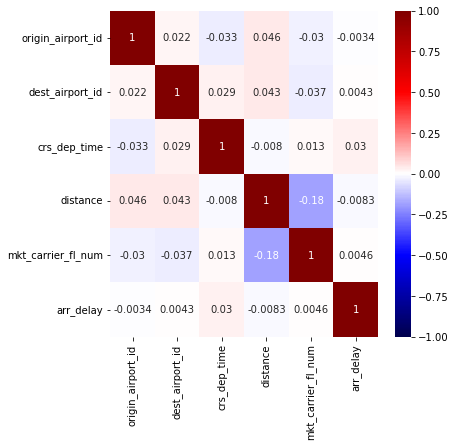

In [68]:
plt.figure(figsize=(6, 6))
sns_heat = sns.heatmap(df_information_flights.iloc[:,:6].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
sns_heat.get_figure().savefig("heatmap.png")

### Split your train and target variable

In [70]:
X = df_information_flights.drop(labels=['arr_delay'], axis=1)

In [71]:
Y = df_information_flights['arr_delay']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, Y,train_size = .80 ,test_size=.20, random_state=42)

In [74]:
X

,origin_airport_id,dest_airport_id,crs_dep_time,distance,mkt_carrier_fl_num,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,AA,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,12197,10397,1500,780.0,5286,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,12197,10397,1500,780.0,5286,2018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,14955,12016,1825,780.0,105,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,14955,12016,1825,780.0,105,2019,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,12953,11057,1559,544.0,5287,2018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127097,14082,13230,730,209.0,1608,2019,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1814,266.0,2533,2018,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,10785,12478,1814,266.0,2533,2018,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,10466,12280,1107,266.0,590,2019,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scale your data

In [75]:
from sklearn.preprocessing import StandardScaler
# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling Linear Regresion

In [76]:
# importing module
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred = LR.predict(X_test)

In [78]:
y_pred

array([ 6.21804285,  4.12233972,  1.94686365, ..., 11.09871912,
        7.79305505,  7.68581628])

In [79]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.028086265984892167

In [127]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

27.424532891104768

In [128]:
r2_score(y_test,y_pred)

0.02166615361172941

In [129]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3028.3874572012314

In [130]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))

Training set score: 0.02
Test set score: 0.02


# MODELING RIDGE REGRESSION

In [131]:
from sklearn.linear_model import Ridge

In [132]:
ridge = Ridge(alpha = 1000).fit(X_train, y_train)

In [133]:
y_pred = ridge.predict(X_test)

In [134]:
y_pred

array([ 5.73949274,  1.3694175 ,  2.89692052, ..., 12.69356632,
        2.3062587 ,  1.10149613])

In [135]:
mean_absolute_error(y_test,y_pred)

27.424453155213236

In [136]:
r2_score(y_test,y_pred)

0.021659011016140206

In [137]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.02
Test set score: 0.02


# MODELING LASSO REGRESSION

In [138]:
from sklearn.linear_model import Lasso

In [139]:
lasso = Lasso(alpha = 0.001, max_iter = 100000).fit(X_train, y_train)

In [140]:
y_pred = lasso.predict(X_test)

In [141]:
mean_absolute_error(y_test,y_pred)

27.42447149642024

In [142]:
r2_score(y_test,y_pred)

0.021664143819865034

In [143]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.02
Test set score: 0.02


# RANDOM FOREST REGRESSOR

In [144]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [145]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.518132520621652
Mean Squared Error: 2121.7450897869835
Root Mean Squared Error: 46.0624042988095


In [146]:
r2_score(y_test,y_pred)

0.3145609456905124

In [94]:
X_test

array([[-0.91803857,  0.78842548,  1.37925193, ...,  2.00697452,
        -0.17829449, -0.14096345],
       [ 0.89674259,  1.40540552,  1.4299443 , ..., -0.49826243,
        -0.17829449, -0.14096345],
       [ 0.13210604, -0.98243852, -0.17193439, ..., -0.49826243,
        -0.17829449, -0.14096345],
       ...,
       [ 0.52262857, -0.27816236,  0.81149746, ..., -0.49826243,
        -0.17829449, -0.14096345],
       [ 1.45528826,  1.44609995, -0.84107359, ...,  2.00697452,
        -0.17829449, -0.14096345],
       [ 0.72543775, -1.50490247, -0.41525773, ...,  2.00697452,
        -0.17829449, -0.14096345]])

# GRADIENT BOOSTING REGRESSOR

In [106]:
from sklearn import  ensemble

In [107]:
params_gb = {
    "n_estimators": 15,
    "max_depth": None,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [108]:
reg = ensemble.GradientBoostingRegressor(**params_gb)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=None,
                          min_samples_split=5, n_estimators=15)

In [109]:
y_pred = reg.predict(X_test)

In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 26.43317854096078


In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score(y_test,y_pred)

0.07739587022899919

# Prepare Flight Test

In [147]:
query_flight_test = "SELECT * FROM flights_test WHERE fl_date between '2020-01-01' and '2020-01-07' ORDER BY fl_date ASC LIMIT 15000000;"

In [148]:
flights_test = pd.read_sql_query(query_flight_test, engine)

In [149]:
flights_test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2020-01-07,AA,AA,AA,2729,AA,N337PJ,2729,10529,BDL,"Hartford, CT",11298,DFW,"Dallas/Fort Worth, TX",630,955,N,265,1,1471
150619,2020-01-07,AA,AA,AA,2730,AA,N559UW,2730,10721,BOS,"Boston, MA",11298,DFW,"Dallas/Fort Worth, TX",1000,1341,N,281,1,1562
150620,2020-01-07,AA,AA,AA,2731,AA,N928AN,2731,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1318,1515,N,117,1,541
150621,2020-01-07,AA,AA,AA,2733,AA,N816AA,2733,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1625,2121,N,176,1,1235


### Step 1 fl_date split

In [150]:
flights_test['FL_DATE_year'] = pd.to_datetime(flights_test['fl_date']).dt.year
flights_test['FL_DATE_month'] = pd.to_datetime(flights_test['fl_date']).dt.month
flights_test['FL_DATE_weekday'] = pd.to_datetime(flights_test['fl_date']).dt.weekday

### Step 2 Drop columns to match with X Test

In [151]:
flights_test = flights_test.drop(labels=['fl_date', 'branded_code_share','tail_num','op_carrier_fl_num','origin','dest_city_name','crs_arr_time','dup','crs_elapsed_time'], axis=1)

In [152]:
flights_test = flights_test.drop(labels=['origin_city_name','dest','flights'],axis=1)

In [153]:
flights_test = flights_test.drop(labels=['mkt_unique_carrier','mkt_carrier'],axis=1)

### Step 3 Rename op_unique_carrier and hot encoding

In [154]:
flights_test = flights_test.rename(columns={"op_unique_carrier": "unique_carrier"})

In [155]:
dummy_ft_unique_carrier = pd.get_dummies(flights_test['unique_carrier'])

In [156]:
X

,origin_airport_id,dest_airport_id,crs_dep_time,distance,mkt_carrier_fl_num,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,AA,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,11298,13930,1235,802.0,1233,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,11298,13930,1235,802.0,1233,2018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,14771,12892,1600,802.0,215,2019,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
0,14771,12892,1600,802.0,215,2019,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11057,13303,955,650.0,1234,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127097,11423,11292,555,261.0,4592,2019,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,11630,10299,857,261.0,2802,2018,1,6,0,0,...,0,0,0,0,0,1,0,0,0,0
127098,11630,10299,857,261.0,2802,2018,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,10599,11292,805,261.0,4591,2019,1,6,0,0,...,0,0,0,0,0,1,0,0,0,0


In [157]:
flights_test = pd.merge(
    left=flights_test,
    right=dummy_ft_unique_carrier,
    left_index=True,
    right_index=True,
)

In [158]:
flights_test

,mkt_carrier_fl_num,unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,distance,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,...,NK,OH,OO,PT,QX,UA,WN,YV,YX,ZW
0,5888,WN,13891,14771,1810,363,2020,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1,6276,WN,13891,14771,1150,363,2020,1,2,0,...,0,0,0,0,0,0,1,0,0,0
2,4598,WN,13891,14831,2020,333,2020,1,2,0,...,0,0,0,0,0,0,1,0,0,0
3,4761,WN,13891,14831,1340,333,2020,1,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5162,WN,13891,14831,915,333,2020,1,2,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2729,AA,10529,11298,630,1471,2020,1,1,0,...,0,0,0,0,0,0,0,0,0,0
150619,2730,AA,10721,11298,1000,1562,2020,1,1,0,...,0,0,0,0,0,0,0,0,0,0
150620,2731,AA,11057,12478,1318,541,2020,1,1,0,...,0,0,0,0,0,0,0,0,0,0
150621,2733,AA,12892,11298,1625,1235,2020,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
flights_test = flights_test.drop(labels=['unique_carrier'],axis=1)

In [160]:
flights_test.columns

Index(['mkt_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'distance', 'FL_DATE_year', 'FL_DATE_month',
       'FL_DATE_weekday', '9E', 'AA', 'AS', 'AX', 'B6', 'C5', 'CP', 'DL', 'EM',
       'EV', 'F9', 'G4', 'G7', 'HA', 'MQ', 'NK', 'OH', 'OO', 'PT', 'QX', 'UA',
       'WN', 'YV', 'YX', 'ZW'],
      dtype='object')

In [161]:
X.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'distance',
       'mkt_carrier_fl_num', 'FL_DATE_year', 'FL_DATE_month',
       'FL_DATE_weekday', '9E', 'AA', 'AS', 'B6', 'CP', 'DL', 'EV', 'F9', 'G4',
       'G7', 'HA', 'MQ', 'NK', 'OH', 'OO', 'QX', 'UA', 'WN', 'YV', 'YX'],
      dtype='object')

### Step 4  Unique carriers not found in Xtest

In [162]:
flights_test = flights_test.drop(labels=['AX','C5','EM','PT','ZW'],axis=1)

In [163]:
flights_test.dtypes

mkt_carrier_fl_num    int64
origin_airport_id     int64
dest_airport_id       int64
crs_dep_time          int64
distance              int64
FL_DATE_year          int64
FL_DATE_month         int64
FL_DATE_weekday       int64
9E                    uint8
AA                    uint8
AS                    uint8
B6                    uint8
CP                    uint8
DL                    uint8
EV                    uint8
F9                    uint8
G4                    uint8
G7                    uint8
HA                    uint8
MQ                    uint8
NK                    uint8
OH                    uint8
OO                    uint8
QX                    uint8
UA                    uint8
WN                    uint8
YV                    uint8
YX                    uint8
dtype: object

In [164]:
flights_test

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,distance,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,AA,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,5888,13891,14771,1810,363,2020,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6276,13891,14771,1150,363,2020,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4598,13891,14831,2020,333,2020,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4761,13891,14831,1340,333,2020,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5162,13891,14831,915,333,2020,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2729,10529,11298,630,1471,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
150619,2730,10721,11298,1000,1562,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
150620,2731,11057,12478,1318,541,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
150621,2733,12892,11298,1625,1235,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [165]:
X

,origin_airport_id,dest_airport_id,crs_dep_time,distance,mkt_carrier_fl_num,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,AA,...,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX
0,11298,13930,1235,802.0,1233,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,11298,13930,1235,802.0,1233,2018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,14771,12892,1600,802.0,215,2019,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
0,14771,12892,1600,802.0,215,2019,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11057,13303,955,650.0,1234,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127097,11423,11292,555,261.0,4592,2019,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,11630,10299,857,261.0,2802,2018,1,6,0,0,...,0,0,0,0,0,1,0,0,0,0
127098,11630,10299,857,261.0,2802,2018,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
127098,10599,11292,805,261.0,4591,2019,1,6,0,0,...,0,0,0,0,0,1,0,0,0,0


In [166]:
y_pred = regressor.predict(flights_test)

C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [169]:
y_pred.to_csv('submission_csv_January_2020')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [170]:
df = pd.DataFrame(y_pred)

In [172]:
df.to_csv('submission_csv_january_2020')

In [173]:
result = pd.concat([flights_test, df], axis=1)

In [174]:
result

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,distance,FL_DATE_year,FL_DATE_month,FL_DATE_weekday,9E,AA,...,MQ,NK,OH,OO,QX,UA,WN,YV,YX,0
0,5888,13891,14771,1810,363,2020,1,2,0,0,...,0,0,0,0,0,0,1,0,0,150.79
1,6276,13891,14771,1150,363,2020,1,2,0,0,...,0,0,0,0,0,0,1,0,0,150.79
2,4598,13891,14831,2020,333,2020,1,2,0,0,...,0,0,0,0,0,0,1,0,0,150.79
3,4761,13891,14831,1340,333,2020,1,2,0,0,...,0,0,0,0,0,0,1,0,0,150.79
4,5162,13891,14831,915,333,2020,1,2,0,0,...,0,0,0,0,0,0,1,0,0,150.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2729,10529,11298,630,1471,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,154.70
150619,2730,10721,11298,1000,1562,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,154.70
150620,2731,11057,12478,1318,541,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,154.70
150621,2733,12892,11298,1625,1235,2020,1,1,0,1,...,0,0,0,0,0,0,0,0,0,154.70


In [178]:
result = result.rename({0 : 'predicted_delay'}, axis=1)



In [180]:
result.to_csv('submission_csv_january_2020')

In [182]:
results1_100_rows = result.head(100)

In [184]:
results1_100_rows.to_csv('submission_csv_100rows_january_2020')